# Setup

In [2]:
# !pip install sklearn

In [3]:
# !pip install tensorflow==2.0.0-alpha0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import pathlib
import glob
import glob2
import os
import folium
import requests
import matplotlib
from datetime import datetime

from statsmodels.tsa.ar_model import AR
from random import random

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
np.random.seed(1234) 
PYTHONHASHSEED = 0

print('Folium installed and imported!')
print(folium.__version__)


Folium installed and imported!
0.10.1


# Data Import 
Source: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

## Downloading latest available data

In [5]:
cwd=pathlib.Path(os.getcwd())
data_dir=pathlib.Path(cwd/'../data')
raw_data=pathlib.Path(data_dir/'raw_data')

In [6]:
data=pathlib.Path(raw_data/'data.humdata/')

In [7]:
data.exists()

True

In [8]:
files=['time_series_covid19_confirmed_global.csv', 'time_series_covid19_deaths_global.csv','time_series_covid19_recovered_global.csv']

for file in files:
    url = f'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2F{file}&filename={file}'
    r = requests.get(url, allow_redirects=True)
    open(data/file, 'wb').write(r.content)

In [9]:
df_cnf=pd.read_csv(data/files[0])
df_dth=pd.read_csv(data/files[1])
df_rcvd=pd.read_csv(data/files[2])

df_cnf.shape, df_dth.shape, df_rcvd.shape

((262, 79), (262, 79), (248, 79))

# Data Frames Heads

In [10]:
df_cnf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [11]:
df_dth.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,6,6,7,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,8,10,10,11,15,15,16,17,20,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,26,29,31,35,44,58,86,105,130,152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,6,8,12,14,15,16,17,18
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2


In [12]:
df_rcvd.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,2,2,5,5,10,10,10,15
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,33,44,52,67,76,89,99,104
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,29,31,31,37,46,61,61,62,90,90
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,10,10,10,10,16,21,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2,2


## Data Cleaning 

In [13]:
df_cnf.drop(['Province/State'] , axis=1, inplace=True)
df_dth.drop(['Province/State'] , axis=1, inplace=True)
df_rcvd.drop(['Province/State'] , axis=1, inplace=True)

In [14]:
df_cnf.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


# ftn steps for understanding 

In [15]:
df_cnf[df_cnf["Country/Region"]=='Australia'] 

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
8,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,...,62,71,77,78,80,84,87,91,93,96
9,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,...,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580
10,Australia,-12.4634,130.8456,0,0,0,0,0,0,0,...,12,15,15,15,17,19,21,22,26,27
11,Australia,-28.0167,153.4000,0,0,0,0,0,0,0,...,555,625,656,689,743,781,835,873,900,907
12,Australia,-34.9285,138.6007,0,0,0,0,0,0,0,...,257,287,299,305,337,367,367,396,407,407
13,Australia,-41.4545,145.9707,0,0,0,0,0,0,0,...,47,62,66,66,69,69,72,74,80,82
14,Australia,-37.8136,144.9631,0,0,0,0,1,1,1,...,574,685,769,821,917,968,1036,1085,1115,1135
15,Australia,-31.9505,115.8605,0,0,0,0,0,0,0,...,231,278,311,355,364,392,400,400,436,453


In [16]:
df_cnf.shape

(262, 78)

In [17]:
# picking the country Australia from the data frame Df_conf and store in variable df
df = df_cnf[df_cnf["Country/Region"]=='Australia']    

In [18]:
# Taking the mean of lat long and storing them in the data frame lat long columns. 
df['Lat'].mean(),df['Long'].mean()
df[['Lat', 'Long']] = df['Lat'].mean(),df['Long'].mean()

In [19]:
# here we can see the lat long mean() is in the column against country Australia.
df.head(10)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
8,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,62,71,77,78,80,84,87,91,93,96
9,Australia,-31.996188,141.232788,0,0,0,0,3,4,4,...,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580
10,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,12,15,15,15,17,19,21,22,26,27
11,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,555,625,656,689,743,781,835,873,900,907
12,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,257,287,299,305,337,367,367,396,407,407
13,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,47,62,66,66,69,69,72,74,80,82
14,Australia,-31.996188,141.232788,0,0,0,0,1,1,1,...,574,685,769,821,917,968,1036,1085,1115,1135
15,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,231,278,311,355,364,392,400,400,436,453


In [20]:
df.columns[-1]

'4/5/20'

In [21]:
df[df.columns[-1]]

8       96
9     2580
10      27
11     907
12     407
13      82
14    1135
15     453
Name: 4/5/20, dtype: int64

In [22]:
df[df.columns[-1]].sum()

5687

In [23]:
df["Total"] = df[df.columns[-1]].sum()

In [24]:
df

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,Total
8,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,71,77,78,80,84,87,91,93,96,5687
9,Australia,-31.996188,141.232788,0,0,0,0,3,4,4,...,1617,1791,2032,2032,2182,2298,2389,2493,2580,5687
10,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,15,15,15,17,19,21,22,26,27,5687
11,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,625,656,689,743,781,835,873,900,907,5687
12,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,287,299,305,337,367,367,396,407,407,5687
13,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,62,66,66,69,69,72,74,80,82,5687
14,Australia,-31.996188,141.232788,0,0,0,0,1,1,1,...,685,769,821,917,968,1036,1085,1115,1135,5687
15,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,278,311,355,364,392,400,400,436,453,5687


# Function Define

In [25]:
# The Below function calculate the sum of repeated countries and Lat Long mean()

In [26]:
def total(df_cases):
    
    df_final = pd.DataFrame()
    for country in df_cases['Country/Region'].unique():
        df = df_cases[df_cases["Country/Region"]== country]
        df[['Lat', 'Long']] = df['Lat'].mean(),df['Long'].mean()
        df["Total"] = df[df.columns[-1]].sum()
        df=df.head(1)
        df_final = df_final.append(df)
    return df_final

In [27]:
df_final_cnf = total(df_cnf)
df_final_dth = total(df_dth)
df_final_rcvd = total(df_rcvd)

# Final DF's Head

### Confirmed Head

In [28]:
df_final_cnf.head(20)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,Total
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,110,120,170,174,237,273,281,299,349,349
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,197,212,223,243,259,277,304,333,361,361
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,454,511,584,716,847,986,1171,1251,1320,1320
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,308,334,370,376,390,428,439,466,501,501
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,5,7,7,7,8,8,8,10,14,14
5,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,...,7,7,7,7,7,9,15,15,15,15
6,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,...,690,745,820,1054,1054,1133,1265,1451,1451,1451
7,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,...,407,424,482,532,571,663,736,770,822,822
8,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,...,71,77,78,80,84,87,91,93,96,5687
16,Austria,47.516200,14.550100,0,0,0,0,0,0,0,...,8271,8788,9618,10180,10711,11129,11524,11781,12051,12051


In [29]:
df_final_cnf.columns.nunique()

79

### Deaths's Head

In [30]:
df_final_dth.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,Total
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,4,4,4,4,4,6,6,7,7,7
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,10,10,11,15,15,16,17,20,20,20
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,29,31,35,44,58,86,105,130,152,152
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,3,6,8,12,14,15,16,17,18,18
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2


### Recovered head

In [31]:
df_final_rcvd.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,Total
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,2,2,2,5,5,10,10,10,15,15
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,31,33,44,52,67,76,89,99,104,104
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,31,31,37,46,61,61,62,90,90,90
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,10,10,10,10,16,21,26,26
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,2,2,2


In [32]:
df_final_dth.nunique()

Country/Region    183
Lat               176
Long              178
1/22/20             1
1/23/20             1
                 ... 
4/2/20             56
4/3/20             60
4/4/20             59
4/5/20             61
Total              67
Length: 79, dtype: int64

In [33]:
df_final_cnf.shape, df_final_dth.shape, df_final_rcvd.shape 

((183, 79), (183, 79), (183, 79))

# Folium

In [34]:
# define the world map
world_map = folium.Map()

In [35]:
world_map=folium.Map(tiles='Stamen Terrain')
incidents = folium.map.FeatureGroup()


for cntry in df_final_cnf['Country/Region'].unique():
    df=df_final_cnf[df_final_cnf['Country/Region']==cntry]
    conf=df['Total']
    
    incidents.add_child(
        folium.CircleMarker(  
            [df['Lat'], df['Long']],
            radius= int(conf)/3000, 
            popup= str(cntry).upper() + '\nConfirmed:' + str(int(conf)) +
            '\nDeaths:' + str(int(df_final_dth[df_final_dth['Country/Region']==cntry]['Total'])) +
            '\nRecovered:' + str(int(df_final_rcvd[df_final_rcvd['Country/Region']==cntry]['Total'])) ,
            tooltip = 'Click Here',
            color=['red'],
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            legend_name='Covid 19 world wide cases'
        )
    )
#     df_final_cnf['Total'].mean()

world_map.add_child(incidents)

# Prediction_plotting

Text(0.5, 0, 'Countries')

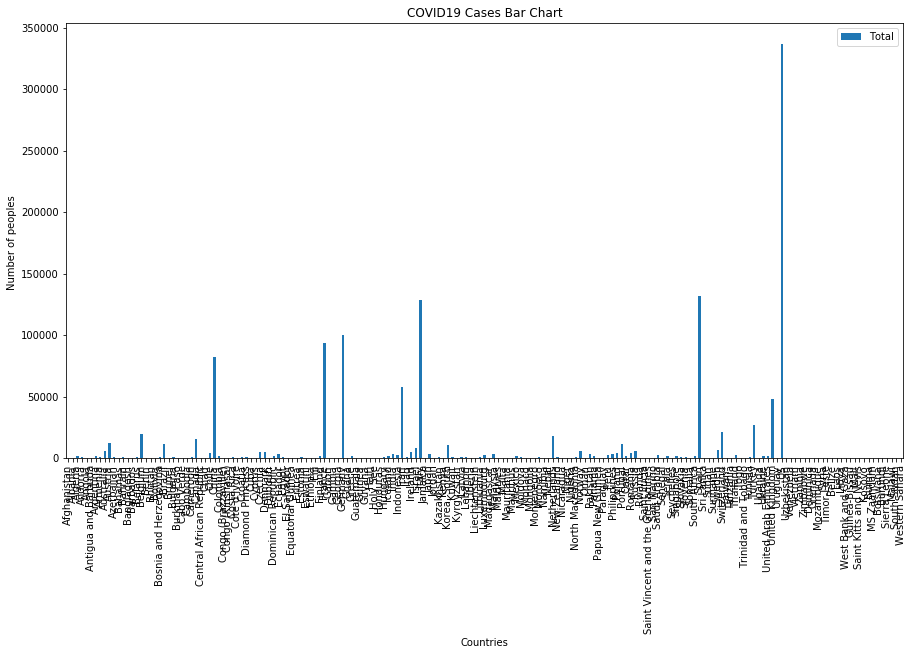

In [36]:
# option 2: preferred option with more flexibility
ax = df_final_cnf.plot(x='Country/Region',y ='Total', kind='bar', figsize=(15, 8))
ax.set_title('COVID19 Cases Bar Chart')
ax.set_ylabel('Number of peoples ')
ax.set_xlabel('Countries')

# Scatter Plot 

In [37]:
df_us = df_final_cnf[df_final_cnf['Country/Region'] == 'US']
df_us

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,Total
225,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,121478,140886,161807,188172,213372,243453,275586,308850,337072,337072


In [38]:
a = df_us.iloc[:,3:]
a.drop(['Total'], axis=1, inplace=True)
a

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
225,1,1,2,2,5,5,5,5,5,7,...,101657,121478,140886,161807,188172,213372,243453,275586,308850,337072


In [39]:
us = a.transpose()
us

,225
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
...,...
4/1/20,213372
4/2/20,243453
4/3/20,275586
4/4/20,308850


In [40]:
us.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20'],
      dtype='object')

In [41]:
us.reset_index(inplace=True)
us

,index,225
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,5
...,...,...
70,4/1/20,213372
71,4/2/20,243453
72,4/3/20,275586
73,4/4/20,308850


In [42]:
# us.columns = ['Dates'] 
us.rename(columns= {'index' :'Dates' , 225: 'Cases'}, inplace=True)

In [43]:
us

,Dates,Cases
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,5
...,...,...
70,4/1/20,213372
71,4/2/20,243453
72,4/3/20,275586
73,4/4/20,308850


In [44]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Dates   75 non-null     object
 1   Cases   75 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [45]:
us['Dates'] = us['Dates'].astype('datetime64[ns]')

In [46]:
#converted the date datatype int datetime64[ns]
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   75 non-null     datetime64[ns]
 1   Cases   75 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


In [47]:
us

,Dates,Cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
70,2020-04-01,213372
71,2020-04-02,243453
72,2020-04-03,275586
73,2020-04-04,308850


Text(0.5, 0, 'Dates')

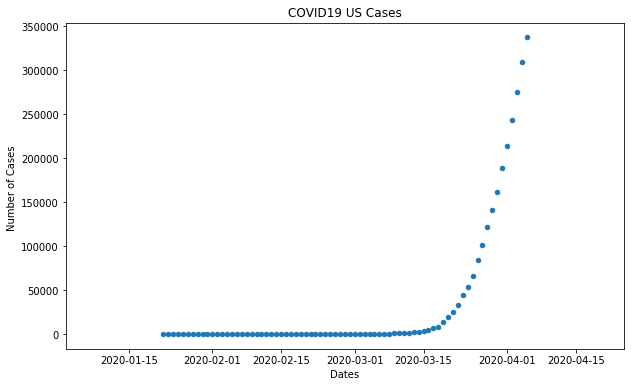

In [48]:
# option 2: preferred option with more flexibility
ax = us.plot(x= 'Dates' ,y ='Cases', kind='scatter', figsize=(10, 6))
ax.set_title('COVID19 US Cases')
ax.set_ylabel('Number of Cases ')
ax.set_xlabel('Dates')


# Linear Regression

In [49]:
us.tail()

,Dates,Cases
70,2020-04-01,213372
71,2020-04-02,243453
72,2020-04-03,275586
73,2020-04-04,308850
74,2020-04-05,337072


In [50]:
us.head(15)

,Dates,Cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
5,2020-01-27,5
6,2020-01-28,5
7,2020-01-29,5
8,2020-01-30,5
9,2020-01-31,7


In [51]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
X = us.loc[0:4,'Cases']

In [53]:
X

0    1
1    1
2    2
3    2
4    5
Name: Cases, dtype: int64

In [54]:
X = np.array(X)

In [55]:
X = X.reshape(-1, 1)

In [56]:
X

array([[1],
       [1],
       [2],
       [2],
       [5]], dtype=int64)

In [57]:
X.shape

(5, 1)

In [58]:
Y = us.loc[1:5,'Cases']

In [59]:
Y

1    1
2    2
3    2
4    5
5    5
Name: Cases, dtype: int64

In [60]:
Y = np.array(Y)

In [61]:
Y = Y.reshape(-1, 1)

In [62]:
Y

array([[1],
       [2],
       [2],
       [5],
       [5]], dtype=int64)

In [63]:
Y.shape

(5, 1)

In [64]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
yhat = lm.predict(X)
yhat[2]

array([2.83333333])

In [66]:
print(lm.intercept_ , lm.coef_ )

[1.16666667] [[0.83333333]]


## Example Lr

In [97]:
xs = np.array([0, 1, 1, 3, 4 ], dtype=int)
ys = np.array([1, 1, 3, 4, 7], dtype= int) 

In [98]:
xs = xs.reshape(-1, 1)

In [99]:
xs

array([[0],
       [1],
       [1],
       [3],
       [4]])

In [100]:
xs.shape

(5, 1)

In [101]:
ys = ys.reshape(-1, 1)

In [102]:
ys

array([[1],
       [1],
       [3],
       [4],
       [7]])

In [103]:
ys.shape

(5, 1)

In [104]:
lm.fit(xs, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
y_e = lm.predict(xs)
y_e[1]

array([2.07407407])

## Example Lr 2

In [117]:
es = np.array([-1, 0, 2, 3 ], dtype=int)
fs = np.array([-3, -1, 3, 5], dtype= int) 
es = es.reshape(-1, 1)
fs = fs.reshape(-1, 1)
lm.fit(es, fs)
p = lm.predict(es)
print(p[3])

print(lm.intercept_)
print(lm.coef_)

print('/n The Equation of Prediction is:' + str(lm.intercept_) + str('X') + str(lm.coef_))

[5.]
[-1.]
[[2.]]
/n The Equation of Prediction is:[-1.]X[[2.]]


# Tensor Flow_Prediction

In [827]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)
model.fit(xs, ys, epochs=1000)
print(model.predict([7.0]))

ModuleNotFoundError: No module named 'tensorflow'

# Extra Approaches

In [ ]:
# # instantiate a feature group for the incidents in the dataframe
# world_map=folium.Map()
# incidents = folium.map.FeatureGroup()


# for lat, lng in zip(df_final_cnf.Lat, df_final_cnf.Long):

#     cntry=df_final_cnf[(df_final_cnf.Lat==lat) & (df_final_cnf.Long==lng)]['Country/Region']
#     conf=int(df_final_cnf[(df_final_cnf.Lat==lat) & (df_final_cnf.Long==lng)]['Total'])
#     dth=int(df_final_dth[(df_final_dth.Lat==lat) & (df_final_dth.Long==lng)]['Total'])
#     rcd=int(df_final_rcvd[(df_final_rcvd.Lat==lat) & (df_final_rcvd.Long==lng)]['Total'])

#     incidents.add_child(
#         folium.CircleMarker(
#             [lat, lng],
#             radius= conf/3000, # define how big you want the circle markers to be
#             popup= 'Country:' + str(cntry.values) + '\nConfirmed:' + str(conf) + '\nDeaths:' + str(dth) + '\nRecovered:' + str(rcd),
#             tooltip = 'Click Here',
#             color='#3186cc',
#             fill=True,
#             fill_color='#3186cc',
#             fill_opacity=0.5
#         )
#     )

# # # add incidents to map
# world_map.add_child(incidents)

In [ ]:

# for lat, lng in zip(df_final_cnf.Lat, df_final_cnf.Long):
    
#     cntry=df_final_cnf[(df_final_cnf.Lat==lat) & (df_final_cnf.Long==lng)]['Country/Region'].values
#     conf=df_final_cnf[(df_final_cnf.Lat==lat) & (df_final_cnf.Long==lng)]['Total']
#     print(cntry, conf.shape)
# #     print(cntry[21:])

In [ ]:
# if you want to take the sum of dates then use this command 
# df_cnf['Total'] = df_cnf.loc[:,'1/22/20':'3/14/20'].sum(axis=1) 

# df_cnf["Total"] = df_cnf.loc[:, '3/14/20']

In [59]:
# a = df_slc.groupby(['Country/Region','Lat', 'Long'], as_index=False).mean()
# a.tail(10)

# df_slc.loc[:,'Lat':'Long'].mean(axis=0)

In [ ]:
# df_slc = df_cnf[['Country/Region','Lat', 'Long','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20']].iloc[:,:]

In [ ]:
# if you want to pick only one row of country against multiple same rows 
# df_final[df_final["Country/Region"]== 'Australia'].head(1)

In [ ]:
# for lat, lng, in zip(df_final_cnf.Lat, df_final_cnf.Long):

#     cntry=df_final_cnf[(df_final_cnf.Lat==lat) & (df_final_cnf.Long==lng)]['Country/Region']
#     print(cntry.values)

In [ ]:
# print(df_final_cnf.index)

In [ ]:
# for lat, lng, in zip(df_final_cnf.Lat, df_final_cnf.Long):

#     cntry=df_final_cnf[(df_final_cnf.Lat==lat) & (df_final_cnf.Long==lng)]['Country/Region']
#     print(cntry.values)

In [ ]:

# # df.columns.get_loc("pear")
# df_final_cnf['Country/Region'].values[]

In [ ]:
# df_us.columns.values[3:].plot(figsize=(15, 8), color='darkblue')
# title('COVID19 Cases Bar Chart')
# ylabel('Number of peoples ')
# xlabel('Countries')

In [ ]:
# df_us.columns.values[3:]

In [ ]:
# df_us.columns.names

In [385]:
# a.columns = list(map(datetime64[ns, a.columns))

In [642]:
# fit = np.polyfit(x_seq, Y, 1)
# fit_fn = np.poly1d(fit)
# print('Slope = ', fit[0], ", ","Intercept = ", fit[1])
# print(fit_fn)